In [1]:
clear; clc; format long;
%1D-Genz
g = @(xi) exp(-0.5*abs(xi)); %C0 function

In [2]:
error = [];
error_mean = [];
polyBasis = 'Hermite';
%Gauss-Hermite/Legendre quadrature points (Q-points)
Q = 100;
[xi,w] = gaussQuad(Q,polyBasis);
g_pts = g(xi);


%MSE quadrature points 
Q_mse = 500;
[xi_mse,w_mse] = gaussQuad(Q_mse,polyBasis);


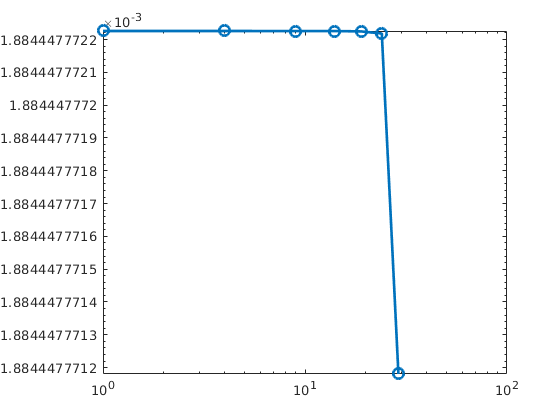

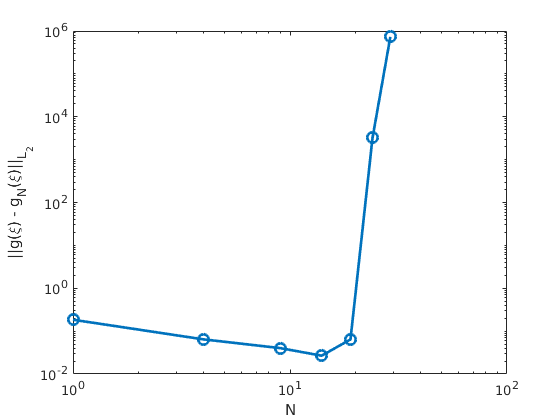

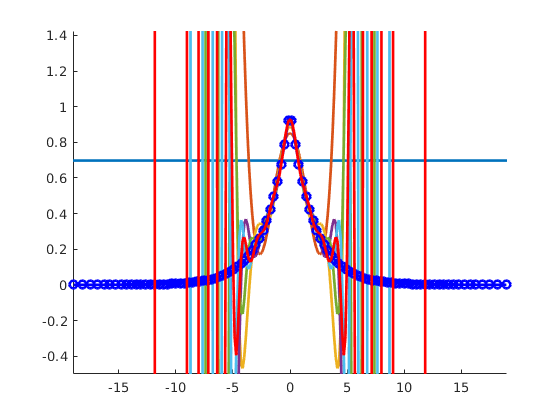

In [3]:
order = [1,4,9,14,19,24,29];

for N = order
    gamma = factorial(0:N);
    g_hat = zeros(round(N),1); 
    g_approx = 0;
    for i=1:N+1
        polynomial = hermite(xi, i-1);
        g_hat(i,1) = sum(w.*polynomial.*g_pts)/(sum(w.*polynomial.*polynomial));
        %g_hat(i,1) = sum(w.*polynomial.*g_pts)/(gamma(i));
        g_approx = g_approx + g_hat(i,1)*hermite(xi_mse,i-1);
    end
    error_mean = [error_mean;abs((sum(g(xi_mse).*w_mse) - sum(g_approx.*w_mse))/sum(g(xi_mse).*w_mse))];
    error = [error;sqrt(sum(w_mse.*(g(xi_mse) - g_approx).^2))];
    hold on;
    plot(xi_mse, g_approx,'LineWidth',2);
    xlim([min(xi)-0.05,max(xi)+0.05]);
end

plot(xi,g_pts,'bo-','LineWidth',2);
hold on;
plot(xi_mse, g_approx,'r','LineWidth',2);
xlim([min(xi)-0.05,max(xi)+0.05]);
ylim([min(g_pts)-0.5,max(g_pts)+0.5]);
figure(2)
loglog(order, error, '-o','LineWidth',2,'MarkerSize',8);
hold on;
xlabel('N');ylabel('||g(\xi) - g_N(\xi)||_{L_2}')
figure(3)
loglog(order,error_mean,'-o','Linewidth',2,'MarkerSize',8);
